# Finding the Max Sharpe Ratio Portfolio

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd

import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

(0.0, 0.14178366250981309)

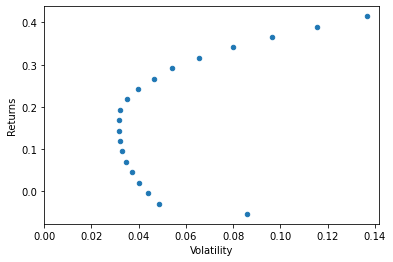

In [6]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)

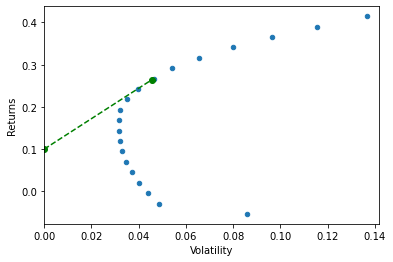

In [16]:
rf = 0.1
w_msr = erk.msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
v_msr = erk.portfolio_vol(w_msr, cov)
# Add CMD (capital market line)
cml_x = [0, v_msr]
cml_y = [rf, r_msr]

ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")

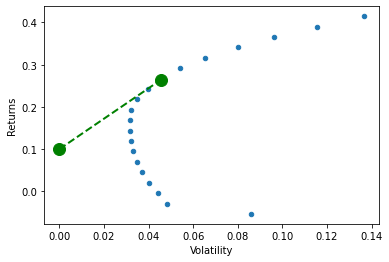

In [19]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

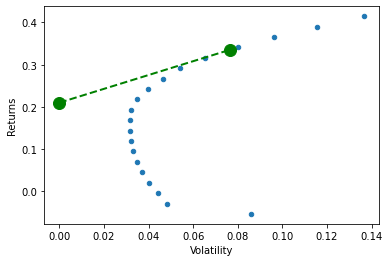

In [23]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.21)